# Ensemble Learning Exercise

## 1. Implementing Random Forest From Scratch (30 points)
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your model will handle **continuous input and output**. 

1.1. Compelete the skeleton class below (you should use scikit-learn's `DecisionTreeRegressor` model that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `n_trees` is the number of trees to create
  - `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
  - `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1]
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  

1.2. The `predict` function will use mean of the target values of the trees. The result is a vector of predictions matching the number of rows in `X`.

1.3. The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

1.4. To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
 


In [43]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd

from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

c:\Users\itay8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# class TreeEnsemble():
#     def __init__(self,  n_trees, sample_sz, n_features, min_leaf):
#         self.n_trees = n_trees
#         self.sample_sz = sample_sz
#         self.n_features = n_features
#         self.min_leaf = min_leaf
#         pass

#     def init_tree(self, tree_num):
#         f_idxs = np.random.permutation(self.X.shape[1])[:self.n_features]
#         idxs = np.random.choice(len(self.y), self.sample_sz)
#         val_indxs = np.setdiff1d(np.arange(len(self.y)),idxs)
#         tree = DecisionTreeRegressor(min_samples_leaf=self.min_leaf)

#     def fit(self, X, y)
        
#     def predict(self, X):
#         pass

#     def oob_mse(self):
#         pass



## 2. Implementing AdaBoost From Scratch (30 points)


2.1.   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (**hint**: you can simulate re-weighting of the samples by an appropriate re-sampling of the train set).

2.2.   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:

2.2.1. For the base weak learners, use any classifier you want (check different types with different configuration, keep them simple = Weak). 

2.2.2. Split the sample set into train and test sets.

2.2.3 Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?





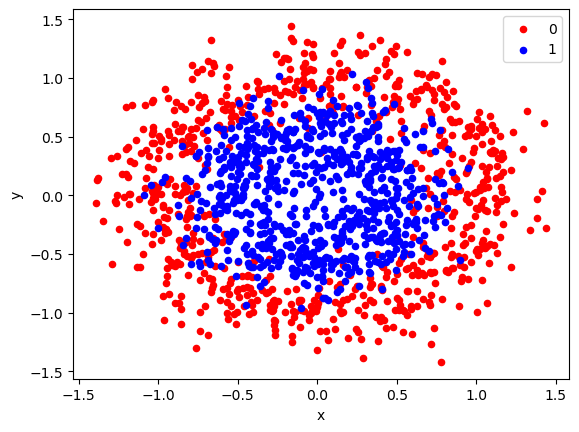

In [4]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [5]:
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.tree_.impurity[0]


0.5

In [6]:
class AdaBoost:
    def __init__(self, base_estimator, n_estimators=50, estimator_params=[]):
        self.estimator_params = estimator_params
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimators = []
        self.estimator_weights = []
        
    
    # steps:
    # 1. Initialize weights give each sample the same weight
    # 2. create model
    #   a. train predict
    # 3. calculate error of the model

    
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        self.sample_weights = np.ones(n_samples) / n_samples
        
        for i in range(self.n_estimators):
            estimator = self.base_estimator(**self.estimator_params)
            estimator.fit(X, y, sample_weight=self.sample_weights)
            
            y_pred = estimator.predict(X)
            # accuracy = (y_pred == y).mean()
            # err = self.sample_weights[(y_pred != y)].sum()
            err = ((y != y_pred) * self.sample_weights).sum()
            
            estimator_weight = np.log((1 - err) / err) / 2
            
            self.estimators.append(estimator)
            self.estimator_weights.append(estimator_weight)
            
            self.sample_weights *= np.exp(-estimator_weight * y * y_pred)
            self.sample_weights /= self.sample_weights.sum()
            
    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        
        for estimator, estimator_weight in zip(self.estimators, self.estimator_weights):
            predictions += estimator_weight * estimator.predict(X)
        
        return np.sign(predictions)

In [7]:
# Split the sample set into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.where(y_train==0,-1,1) # our classifier needs 1 and -1 values
y_test = np.where(y_test==0,-1,1) # our classifier needs 1 and -1 values

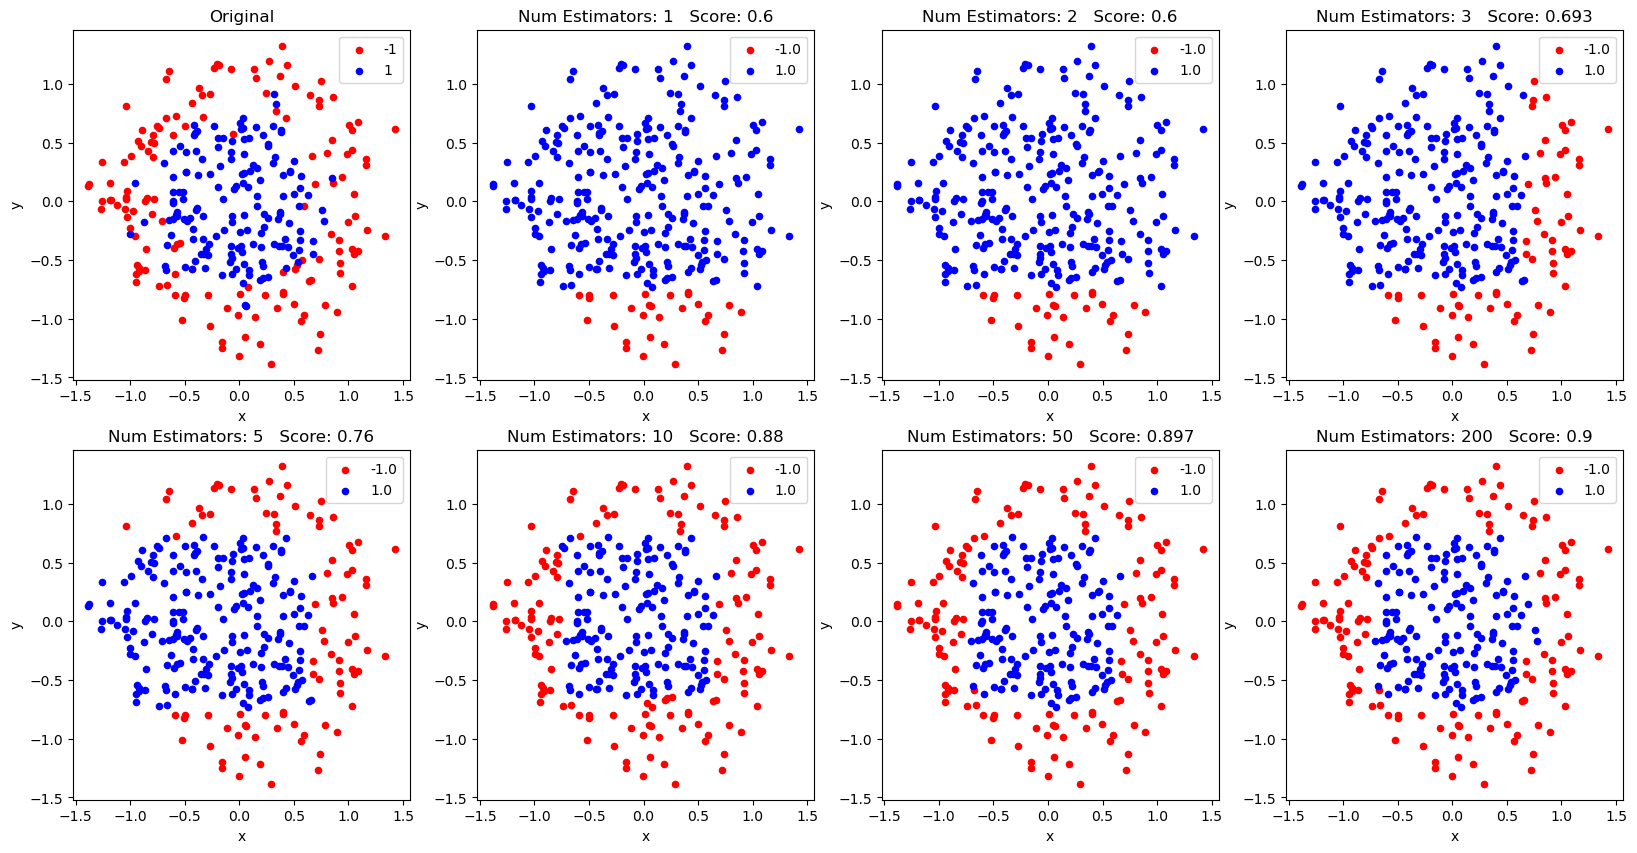

In [8]:
# scatter plot, dots colored by class value
learners = []
n_learners = [1, 2, 3, 5, 10, 50, 200]
scores = []
for j in n_learners:

    dt = DecisionTreeClassifier
    estimator_params = {'max_depth':1}
    ada = AdaBoost(base_estimator=dt, n_estimators=j, estimator_params=estimator_params)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    scores.append(np.array((y_test == y_pred)).mean())
    learners.append(y_pred)



fig, axes = plt.subplots(2,4, figsize=(20, 10))
ax = axes.ravel()

df = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_test))
colors = {-1:'red', 1:'blue'}
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax[0], kind='scatter', x='x', y='y', label=key, color=colors[key], title='Original')

    

for i in range(len(learners)):
    df_test = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=learners[i]))
    colors = {-1:'red', 1:'blue'}
    grouped = df_test.groupby('label')

    for key, group in grouped:
        title = 'Num Estimators: '+str(n_learners[i]) + '   Score: ' + str(round(scores[i],  3))
        group.plot(ax=ax[i+1], kind='scatter', x='x', y='y', label=key, color=colors[key], title=title)
pyplot.show()    



## 3. Boosting Trees from Scratch (40 points)
1. Use the scikit-learn's DecisionTreeRegressor (again :) with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
2. Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
3. Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
4. Add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.

In [9]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

c:\Users\itay8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [250]:
class L2Boost():
    def __init__(self, n_trees, regularizer, early_stop=True):
        self.n_trees = n_trees
        self.regularizer = regularizer
        self.residuals = []
        self.trees = []
        self.early_stop = early_stop

    def fit(self, X, y):
        # Initializing result vector with mean of y
        y_pred = np.mean(y) * np.ones(shape=y.shape)
        self.residuals.append(y_pred)

        
        for i in range(self.n_trees):
            r_i = y - y_pred
            dtr = DecisionTreeRegressor(max_depth=1)

            dtr.fit(X, r_i)
            # Calculating residual of tree num i
            self.trees.append(dtr)
            y_pred = y_pred +  self.regularizer * dtr.predict(X)
            

    def predict(self, X):
        y_pred = self.residuals[0][0] * np.ones(shape=(X.shape[0]))
        for tree in self.trees:
            y_pred = y_pred + self.regularizer * tree.predict(X)
        return y_pred






In [251]:
l2boost = L2Boost(100,0.01)
l2boost.fit(X_train, y_train)

In [252]:

y_pred = l2boost.predict(X_test)
mean_squared_error(y_test, y_pred)

39.32760638716481

In [253]:
dtr = DecisionTreeRegressor(max_depth=1)

res = cross_validate(dtr, X,y, cv=5, scoring=['neg_mean_squared_error'])


In [254]:
max_depths = [2, 5, 10, 15, 75, 100]
scores = []
for depth in max_depths:
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

print(scores)

[25.9931908959712, 20.356259525823308, 10.059770917501947, 9.04151867691521, 11.95450980392157, 12.410784313725493]


In [255]:
n_trees = [1, 2, 5, 10, 15, 75, 100]
scores = []

for n in n_trees:
    l2boost = L2Boost(n,0.1)
    l2boost.fit(X_train, y_train)
    y_pred = l2boost.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

print(scores)

[69.9343631503984, 63.73386096213381, 51.85074866860265, 39.06253665013027, 30.253576121273454, 15.234733231066379, 14.526819797174452]
